In [1]:
# Let us import the main code function with all of it's libraries
exec(open("Function.py").read())
%matplotlib inline

C:\Users\MatheusCF\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Win Probability Evaluation

In this section, we use the data frame we've generated 

## Load data and trained model
A model `Data/2012-17Model.pkl` is generated based on five years play by play the data from 2013 to 2017, which contains roughly 1.5 million play by play rows. Here we use this fitted model, and try to predict the win probability of play by play datas of the games in 2018, i.e., 2017-2018 regular season. We load all the polished data from `Data/AllFeature.csv`

In [2]:
Model = NBAWinProbability(Seasons = 2018)
Model.BuildDF() # transform dataframe to a ready to use one
Model.TrainTestSplit(train_fraction=0) # we are not going to train on this year's data
Model.loadModelPersist('2012-17Model.pkl')

Build DF Completed!
Train-Test Split Completed!


## Visualize the predictions
Once we have obtained the trained model and ready to use dataframe, we can predict the win probability of the away team at each row (event).

In [3]:
Model.WP_list()

For each game we can predict the win probability of the away team with respect to game time remaining. 

#### Game 1: a come back game
On Dec. 5, 2017, Utah Jazz challenges (away) Oklahoma City Thunder (home). UTAH was leading by as many as 17 points in the third quarter, but OKC came back strongly in the fourth quarter and took the game. Typically in these kind of come back games the WP prediction varies a lot, becasue the model (like the one by ESPN) only account for inside-game factors. In our model, we also take team stats as outside-game factors into account. So we a better team is trailed, the model still "believes" the better team to win, and therefore, get more accurate result in terms of WP. 

In the ESPN model, the WP of UTAH was once over 90% in third quarter, but in our model it's only 60%. That means our model is clearly more sophisticated in terms of prediction WP. We are not too much influenced by the scores at the event. In another word, we are not swigging between two teams as much as ESPN model did. Our model is more consistent.

The link to the game (by ESPN): http://www.espn.com/nba/game?gameId=400975102

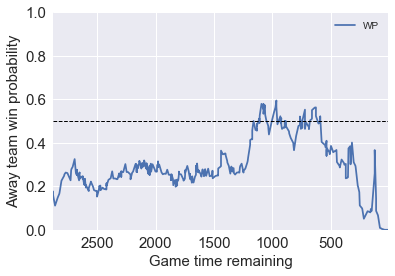

In [4]:
Model.WP_game('201712050OKC')

![title](Data/game2.png)

#### Game 2: a game with overtime

On Nov. 29, 2017, Golden State Warriors visit LA Lakers. There was a overtime in this game, so let's look at how does our model handles overtime. 

Before the game start our model favors the away team GSW by 75%, and ESPN model favors it by 80%. Our model is able to capture the big WP changes at the end of the fourth quarter, where the game was tied. All the trend are captured reasonably good comparing to the model by ESPN.

The link to the game (by ESPN): http://www.espn.com/nba/game?gameId=400975063

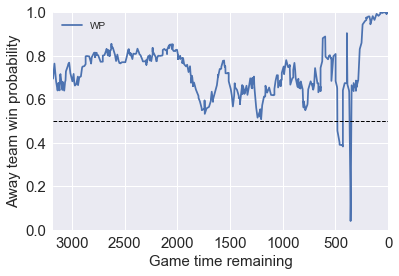

In [5]:
Model.WP_game('201711290LAL')

![title](Data/game1.png)

#### Game 3: a run away game

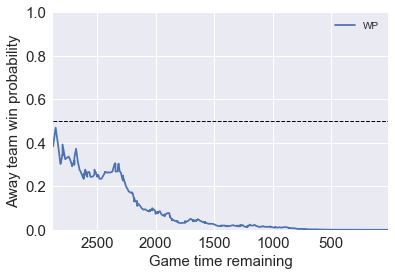

In [6]:
Model.WP_game('201712040UTA')

![title](Data/game3.png)

## Evaluate the accuracy 
From the above discussions, we are pretty confident about the WP offered by our model. Now the issue is, how can we measure the accuracy of this prediction. In this season, there are hundreds of games and tens of thousands of events (sampling points). Among all these events, we have generated their corresponding WPs. To check the accuracy of these WPs, for example, we can select all the events with predicted WP (for away team) in range 60% to 65%, together with their true outcomes. Then we calculate the portion in which the away teams actually win the game. And then we check if it is in or near 60%-65%.

Practically we can make these slides (60%-65%) even smaller: for each percent of predicted WP (e.g., 60%-61%) we calculate the true WP. Then we can plot then in a figure with predicted WP on $x$ and True WP on $y$ (by red line). If our predictions are perfect, it should be a line with 45 degree slope, where predicted WP always equals true WP (by blue line).

The error of the prediction from our model is then calculated by the mean square error from the perfect model. For this year's data, which we've never touched it, the model gives the prediction **within 5% error**. We find it to be a very nice performance. 

WP mean squared error from perfect prediciton is:  4.78251951814 %
Plot completed


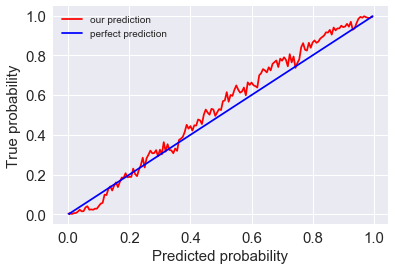

In [7]:
Model.plot_WP_error()